In [2]:
import os
os.chdir('/home/potusvn/Projects/kickstarter_prediction')

In [59]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Dropout
from keras import models, optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l2
from os.path import join
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer
from settings import *

In [4]:
train = pd.read_csv('data/train_quantile_transform.csv', encoding='latin1', low_memory=True)
test = pd.read_csv('data/test_quantile_transform.csv', encoding='latin1', low_memory=True)
val = pd.read_csv('data/val_quantile_transform.csv', encoding='latin1', low_memory=True)

In [5]:
train_x = train.drop(['success'], axis=1)
train_y = train.success

val_x = val.drop(['success'], axis=1)
val_y = val.success

test_x = test.drop(['success'], axis=1)
test_y = test.success

In [56]:
train_x.shape

(185736, 221)

# Step 1: Test the structure of network

## Test layers

In [179]:
def build_model(hidden_layers, optimizer=optimizers.Adam(lr=0.01), batch_size=512, drop_out=0.0, l2_val=0, file_name=None):
    model = models.Sequential()
    # Hidden - Layers
    for idx, layer in enumerate(hidden_layers):
        if idx == 0:
            model.add(Dense(layer, activation="relu", input_shape=(221,), kernel_regularizer=l2(l2_val)))
            model.add(Dropout(drop_out, noise_shape=None, seed=None))
        else:
            model.add(Dense(layer, activation="relu", kernel_regularizer=l2(l2_val)))
            model.add(Dropout(drop_out, noise_shape=None, seed=None))
    # Output- Layer
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    # compiling the model
    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    # Define some callbacks
    callbacks_func = []
    earlyStopping = EarlyStopping(monitor='val_acc', patience=50, verbose=0, mode='max')
    if file_name is None:
        callbacks_func = [earlyStopping]
    else:
        mcp_save = ModelCheckpoint(file_name+'.hdf5', save_best_only=True, monitor='val_acc', mode='max')
        callbacks_func = [mcp_save, earlyStopping]
    results = model.fit(
        train_x, train_y,
        epochs=1000,
        batch_size=batch_size,
        callbacks = callbacks_func,
        validation_data=(val_x, val_y)
    )
    return model, results

In [92]:
def draw_accuracy_train_and_val(history, title):
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(title)
    plt.ylabel('accuracy')
    plt.ylim(0.77, 0.81)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [87]:
model, results = build_model(hidden_layers=[10, 5])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 10)                2220      
_________________________________________________________________
dropout_69 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_91 (Dense)             (None, 5)                 55        
_________________________________________________________________
dropout_70 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_92 (Dense)             (None, 1)                 6         
Total params: 2,281
Trainable params: 2,281
Non-trainable params: 0
_________________________________________________________________
Train on 185736 samples, validate on 46434 samples
Epoch 1/1000
185736/185736 [==============================] - 4s 20us/step - loss: 0.4692

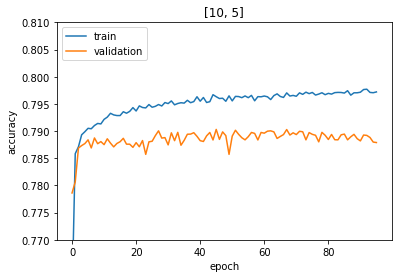

In [93]:
draw_accuracy_train_and_val(results, '[10, 5]')

In [89]:
np.max(results.history['val_acc'])

0.7903045181459546

In [94]:
model2, results2 = build_model(hidden_layers=[100, 50])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 100)               22200     
_________________________________________________________________
dropout_71 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_94 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_72 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 51        
Total params: 27,301
Trainable params: 27,301
Non-trainable params: 0
_________________________________________________________________
Train on 185736 samples, validate on 46434 samples
Epoch 1/1000
185736/185736 [==============================] - 4s 24us/step - loss: 0.45

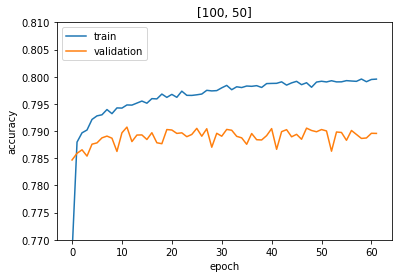

In [95]:
draw_accuracy_train_and_val(results2, '[100, 50]')

In [96]:
np.max(results2.history['val_acc'])

0.7907352372570731

In [97]:
model3, results3 = build_model(hidden_layers=[20, 15, 10])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 20)                4440      
_________________________________________________________________
dropout_73 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_97 (Dense)             (None, 15)                315       
_________________________________________________________________
dropout_74 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_98 (Dense)             (None, 10)                160       
_________________________________________________________________
dropout_75 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_99 (Dense)             (None, 1)                 11        
Total para

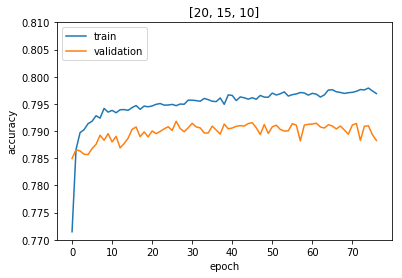

In [98]:
draw_accuracy_train_and_val(results3, '[20, 15, 10]')

In [99]:
np.max(results3.history['val_acc'])

0.7918120342184727

In [100]:
model4, results4 = build_model(hidden_layers=[200, 150, 100])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 200)               44400     
_________________________________________________________________
dropout_76 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_101 (Dense)            (None, 150)               30150     
_________________________________________________________________
dropout_77 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_102 (Dense)            (None, 100)               15100     
_________________________________________________________________
dropout_78 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_103 (Dense)            (None, 1)                 101       
Total para

Epoch 107/1000
185736/185736 [==============================] - 5s 28us/step - loss: 0.3994 - acc: 0.8004 - val_loss: 0.4402 - val_acc: 0.7902
Epoch 108/1000
185736/185736 [==============================] - 5s 28us/step - loss: 0.3992 - acc: 0.8011 - val_loss: 0.4420 - val_acc: 0.7892
Epoch 109/1000
185736/185736 [==============================] - 5s 28us/step - loss: 0.3992 - acc: 0.8002 - val_loss: 0.4408 - val_acc: 0.7869
Epoch 110/1000
185736/185736 [==============================] - 5s 28us/step - loss: 0.3991 - acc: 0.8002 - val_loss: 0.4441 - val_acc: 0.7902
Epoch 111/1000
185736/185736 [==============================] - 5s 28us/step - loss: 0.3984 - acc: 0.8011 - val_loss: 0.4467 - val_acc: 0.7906
Epoch 112/1000
185736/185736 [==============================] - 5s 28us/step - loss: 0.3986 - acc: 0.8008 - val_loss: 0.4444 - val_acc: 0.7891
Epoch 113/1000
185736/185736 [==============================] - 5s 28us/step - loss: 0.3985 - acc: 0.8005 - val_loss: 0.4440 - val_acc: 0.7893

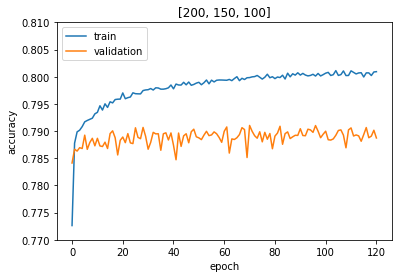

In [101]:
draw_accuracy_train_and_val(results4, '[200, 150, 100]')

In [103]:
np.max(results4.history['val_acc'])

0.7910367403170261

In [104]:
model5, results5 = build_model(hidden_layers=[25, 20, 15, 10])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_104 (Dense)            (None, 25)                5550      
_________________________________________________________________
dropout_79 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_105 (Dense)            (None, 20)                520       
_________________________________________________________________
dropout_80 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_106 (Dense)            (None, 15)                315       
_________________________________________________________________
dropout_81 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_107 (Dense)            (None, 10)                160       
__________

Epoch 105/1000
185736/185736 [==============================] - 3s 16us/step - loss: 0.4015 - acc: 0.7999 - val_loss: 0.4358 - val_acc: 0.7893
Epoch 106/1000
185736/185736 [==============================] - 3s 16us/step - loss: 0.4013 - acc: 0.7994 - val_loss: 0.4405 - val_acc: 0.7881
Epoch 107/1000
185736/185736 [==============================] - 3s 16us/step - loss: 0.4009 - acc: 0.8002 - val_loss: 0.4338 - val_acc: 0.7879
Epoch 108/1000
185736/185736 [==============================] - 3s 16us/step - loss: 0.4008 - acc: 0.8006 - val_loss: 0.4355 - val_acc: 0.7882
Epoch 109/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4010 - acc: 0.8003 - val_loss: 0.4326 - val_acc: 0.7893
Epoch 110/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4009 - acc: 0.8004 - val_loss: 0.4345 - val_acc: 0.7888
Epoch 111/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4010 - acc: 0.8001 - val_loss: 0.4344 - val_acc: 0.7886

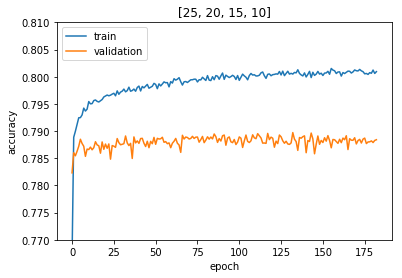

In [105]:
draw_accuracy_train_and_val(results5, '[25, 20, 15, 10]')

In [106]:
np.max(results5.history['val_acc'])

0.7897230478206356

In [107]:
model6, results6 = build_model(hidden_layers=[200, 150, 100, 50])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 200)               44400     
_________________________________________________________________
dropout_83 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_110 (Dense)            (None, 150)               30150     
_________________________________________________________________
dropout_84 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_111 (Dense)            (None, 100)               15100     
_________________________________________________________________
dropout_85 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_112 (Dense)            (None, 50)                5050      
__________

Epoch 105/1000
185736/185736 [==============================] - 5s 29us/step - loss: 0.4045 - acc: 0.7975 - val_loss: 0.4298 - val_acc: 0.7897
Epoch 106/1000
185736/185736 [==============================] - 5s 30us/step - loss: 0.4054 - acc: 0.7974 - val_loss: 0.4267 - val_acc: 0.7887
Epoch 107/1000
185736/185736 [==============================] - 5s 30us/step - loss: 0.4046 - acc: 0.7973 - val_loss: 0.4319 - val_acc: 0.7891


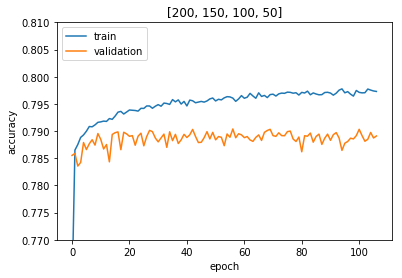

In [108]:
draw_accuracy_train_and_val(results6, '[200, 150, 100, 50]')

In [109]:
np.max(results6.history['val_acc'])

0.7903906621612381

## Test with optimizers

In [110]:
model7, results7 = build_model(hidden_layers=[20, 15, 10], optimizer=optimizers.RMSprop(lr=0.01))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 20)                4440      
_________________________________________________________________
dropout_87 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_115 (Dense)            (None, 15)                315       
_________________________________________________________________
dropout_88 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_116 (Dense)            (None, 10)                160       
_________________________________________________________________
dropout_89 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_117 (Dense)            (None, 1)                 11        
Total para

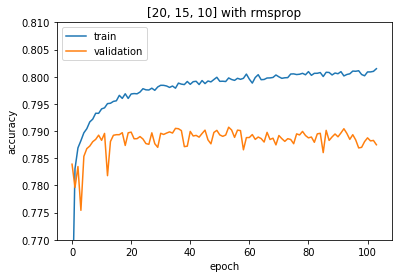

In [114]:
draw_accuracy_train_and_val(results7, '[20, 15, 10] with rmsprop')

In [113]:
np.max(results7.history['val_acc'])

0.7907137011004988

In [115]:
model8, results8 = build_model(hidden_layers=[20,15,10], optimizer=optimizers.SGD(lr=0.01))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 20)                4440      
_________________________________________________________________
dropout_90 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_119 (Dense)            (None, 15)                315       
_________________________________________________________________
dropout_91 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_120 (Dense)            (None, 10)                160       
_________________________________________________________________
dropout_92 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_121 (Dense)            (None, 1)                 11        
Total para

Epoch 107/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4218 - acc: 0.7877 - val_loss: 0.4246 - val_acc: 0.7844
Epoch 108/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4218 - acc: 0.7883 - val_loss: 0.4249 - val_acc: 0.7854
Epoch 109/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4219 - acc: 0.7882 - val_loss: 0.4248 - val_acc: 0.7845
Epoch 110/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4216 - acc: 0.7883 - val_loss: 0.4255 - val_acc: 0.7831
Epoch 111/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4217 - acc: 0.7874 - val_loss: 0.4249 - val_acc: 0.7836
Epoch 112/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4214 - acc: 0.7889 - val_loss: 0.4256 - val_acc: 0.7840
Epoch 113/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4219 - acc: 0.7884 - val_loss: 0.4253 - val_acc: 0.7843

185736/185736 [==============================] - 3s 16us/step - loss: 0.4173 - acc: 0.7913 - val_loss: 0.4223 - val_acc: 0.7854
Epoch 222/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4176 - acc: 0.7900 - val_loss: 0.4264 - val_acc: 0.7830
Epoch 223/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4172 - acc: 0.7904 - val_loss: 0.4236 - val_acc: 0.7850
Epoch 224/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4173 - acc: 0.7910 - val_loss: 0.4228 - val_acc: 0.7858
Epoch 225/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4168 - acc: 0.7910 - val_loss: 0.4316 - val_acc: 0.7802
Epoch 226/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4170 - acc: 0.7908 - val_loss: 0.4243 - val_acc: 0.7845
Epoch 227/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4173 - acc: 0.7909 - val_loss: 0.4218 - val_acc: 0.7876
Epoch 228/1000

185736/185736 [==============================] - 3s 17us/step - loss: 0.4140 - acc: 0.7922 - val_loss: 0.4202 - val_acc: 0.7894
Epoch 336/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4144 - acc: 0.7929 - val_loss: 0.4207 - val_acc: 0.7877
Epoch 337/1000
185736/185736 [==============================] - 3s 16us/step - loss: 0.4142 - acc: 0.7925 - val_loss: 0.4200 - val_acc: 0.7875
Epoch 338/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4140 - acc: 0.7931 - val_loss: 0.4193 - val_acc: 0.7895
Epoch 339/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4141 - acc: 0.7927 - val_loss: 0.4201 - val_acc: 0.7891
Epoch 340/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4140 - acc: 0.7928 - val_loss: 0.4192 - val_acc: 0.7900
Epoch 341/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4141 - acc: 0.7927 - val_loss: 0.4199 - val_acc: 0.7877
Epoch 342/1000

185736/185736 [==============================] - 3s 17us/step - loss: 0.4115 - acc: 0.7947 - val_loss: 0.4219 - val_acc: 0.7877
Epoch 450/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4118 - acc: 0.7949 - val_loss: 0.4177 - val_acc: 0.7910
Epoch 451/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4115 - acc: 0.7948 - val_loss: 0.4189 - val_acc: 0.7891
Epoch 452/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4113 - acc: 0.7946 - val_loss: 0.4213 - val_acc: 0.7867
Epoch 453/1000
185736/185736 [==============================] - 3s 16us/step - loss: 0.4113 - acc: 0.7949 - val_loss: 0.4193 - val_acc: 0.7890
Epoch 454/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4113 - acc: 0.7945 - val_loss: 0.4188 - val_acc: 0.7906
Epoch 455/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4114 - acc: 0.7944 - val_loss: 0.4179 - val_acc: 0.7900
Epoch 456/1000

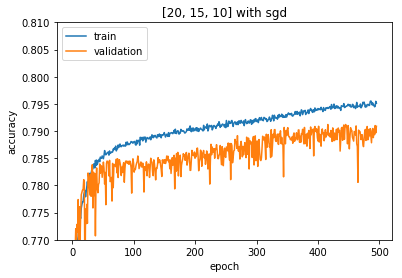

In [116]:
draw_accuracy_train_and_val(results8, '[20, 15, 10] with sgd')

In [117]:
np.max(results8.history['val_acc'])

0.7912090278007615

## Test the batchsize

In [180]:
model9, results9 = build_model(hidden_layers=[20, 15, 10], batch_size=256, file_name='model9')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_208 (Dense)            (None, 20)                4440      
_________________________________________________________________
dropout_158 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_209 (Dense)            (None, 15)                315       
_________________________________________________________________
dropout_159 (Dropout)        (None, 15)                0         
_________________________________________________________________
dense_210 (Dense)            (None, 10)                160       
_________________________________________________________________
dropout_160 (Dropout)        (None, 10)                0         
_________________________________________________________________
dense_211 (Dense)            (None, 1)                 11        
Total para

In [181]:
np.max(results9.history['val_acc'])

0.7908644527254648

In [182]:
model10, results10 = build_model(hidden_layers=[20, 15, 10], batch_size=128, file_name='model10')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_212 (Dense)            (None, 20)                4440      
_________________________________________________________________
dropout_161 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_213 (Dense)            (None, 15)                315       
_________________________________________________________________
dropout_162 (Dropout)        (None, 15)                0         
_________________________________________________________________
dense_214 (Dense)            (None, 10)                160       
_________________________________________________________________
dropout_163 (Dropout)        (None, 10)                0         
_________________________________________________________________
dense_215 (Dense)            (None, 1)                 11        
Total para

Epoch 107/1000
185736/185736 [==============================] - 8s 41us/step - loss: 0.4069 - acc: 0.7978 - val_loss: 0.4227 - val_acc: 0.7890
Epoch 108/1000
185736/185736 [==============================] - 8s 41us/step - loss: 0.4061 - acc: 0.7985 - val_loss: 0.4245 - val_acc: 0.7896
Epoch 109/1000
185736/185736 [==============================] - 8s 41us/step - loss: 0.4061 - acc: 0.7984 - val_loss: 0.4256 - val_acc: 0.7893
Epoch 110/1000
185736/185736 [==============================] - 8s 41us/step - loss: 0.4062 - acc: 0.7977 - val_loss: 0.4265 - val_acc: 0.7896
Epoch 111/1000
185736/185736 [==============================] - 8s 41us/step - loss: 0.4060 - acc: 0.7982 - val_loss: 0.4234 - val_acc: 0.7881
Epoch 112/1000
185736/185736 [==============================] - 8s 41us/step - loss: 0.4060 - acc: 0.7979 - val_loss: 0.4316 - val_acc: 0.7873
Epoch 113/1000
185736/185736 [==============================] - 8s 41us/step - loss: 0.4061 - acc: 0.7986 - val_loss: 0.4240 - val_acc: 0.7891

In [183]:
np.max(results10.history['val_acc'])

0.7907137011107679

In [184]:
model11, results11 = build_model(hidden_layers=[20, 15, 10], batch_size=32, file_name='model11')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_216 (Dense)            (None, 20)                4440      
_________________________________________________________________
dropout_164 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_217 (Dense)            (None, 15)                315       
_________________________________________________________________
dropout_165 (Dropout)        (None, 15)                0         
_________________________________________________________________
dense_218 (Dense)            (None, 10)                160       
_________________________________________________________________
dropout_166 (Dropout)        (None, 10)                0         
_________________________________________________________________
dense_219 (Dense)            (None, 1)                 11        
Total para

Epoch 49/1000
185736/185736 [==============================] - 22s 118us/step - loss: 0.4143 - acc: 0.7922 - val_loss: 0.4213 - val_acc: 0.7889
Epoch 50/1000
185736/185736 [==============================] - 22s 116us/step - loss: 0.4141 - acc: 0.7919 - val_loss: 0.4241 - val_acc: 0.7881
Epoch 51/1000
185736/185736 [==============================] - 22s 118us/step - loss: 0.4145 - acc: 0.7920 - val_loss: 0.4216 - val_acc: 0.7872
Epoch 52/1000
185736/185736 [==============================] - 23s 125us/step - loss: 0.4150 - acc: 0.7921 - val_loss: 0.4199 - val_acc: 0.7882
Epoch 53/1000
185736/185736 [==============================] - 22s 120us/step - loss: 0.4141 - acc: 0.7926 - val_loss: 0.4249 - val_acc: 0.7866
Epoch 54/1000
185736/185736 [==============================] - 22s 118us/step - loss: 0.4142 - acc: 0.7927 - val_loss: 0.4231 - val_acc: 0.7878
Epoch 55/1000
185736/185736 [==============================] - 22s 119us/step - loss: 0.4141 - acc: 0.7922 - val_loss: 0.4234 - val_acc:

In [185]:
np.max(results11.history['val_acc'])

0.7899168712581298

## Test the dropout, L2 regulization and learning rate

In [128]:
model12, results12 = build_model(hidden_layers=[20, 15, 10], drop_out=0.1, file_name='model12')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_137 (Dense)            (None, 20)                4440      
_________________________________________________________________
dropout_104 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_138 (Dense)            (None, 15)                315       
_________________________________________________________________
dropout_105 (Dropout)        (None, 15)                0         
_________________________________________________________________
dense_139 (Dense)            (None, 10)                160       
_________________________________________________________________
dropout_106 (Dropout)        (None, 10)                0         
_________________________________________________________________
dense_140 (Dense)            (None, 1)                 11        
Total para

In [129]:
np.max(results12.history['val_acc'])

0.7913382434616996

In [130]:
model13, results13 = build_model(hidden_layers=[20, 15, 10], l2_val=0.0001,file_name='model13')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 20)                4440      
_________________________________________________________________
dropout_107 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_142 (Dense)            (None, 15)                315       
_________________________________________________________________
dropout_108 (Dropout)        (None, 15)                0         
_________________________________________________________________
dense_143 (Dense)            (None, 10)                160       
_________________________________________________________________
dropout_109 (Dropout)        (None, 10)                0         
_________________________________________________________________
dense_144 (Dense)            (None, 1)                 11        
Total para

In [132]:
np.max(results13.history['val_acc'])

0.7889908255006616

In [133]:
model14, results14 = build_model(hidden_layers=[20,15,10], drop_out=0.1, l2_val=0.0001,file_name='model14')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 20)                4440      
_________________________________________________________________
dropout_110 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_146 (Dense)            (None, 15)                315       
_________________________________________________________________
dropout_111 (Dropout)        (None, 15)                0         
_________________________________________________________________
dense_147 (Dense)            (None, 10)                160       
_________________________________________________________________
dropout_112 (Dropout)        (None, 10)                0         
_________________________________________________________________
dense_148 (Dense)            (None, 1)                 11        
Total para

In [134]:
np.max(results14.history['val_acc'])

0.7864711204461156

In [135]:
model15, results15 = build_model(hidden_layers=[20,15,10], optimizer=optimizers.Adam(lr=0.001),file_name='model15')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_149 (Dense)            (None, 20)                4440      
_________________________________________________________________
dropout_113 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_150 (Dense)            (None, 15)                315       
_________________________________________________________________
dropout_114 (Dropout)        (None, 15)                0         
_________________________________________________________________
dense_151 (Dense)            (None, 10)                160       
_________________________________________________________________
dropout_115 (Dropout)        (None, 10)                0         
_________________________________________________________________
dense_152 (Dense)            (None, 1)                 11        
Total para

Epoch 107/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.3975 - acc: 0.8024 - val_loss: 0.4200 - val_acc: 0.7912
Epoch 108/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.3976 - acc: 0.8023 - val_loss: 0.4233 - val_acc: 0.7902
Epoch 109/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.3975 - acc: 0.8026 - val_loss: 0.4197 - val_acc: 0.7912
Epoch 110/1000
185736/185736 [==============================] - 3s 16us/step - loss: 0.3970 - acc: 0.8027 - val_loss: 0.4203 - val_acc: 0.7900
Epoch 111/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.3973 - acc: 0.8027 - val_loss: 0.4219 - val_acc: 0.7908
Epoch 112/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.3974 - acc: 0.8025 - val_loss: 0.4218 - val_acc: 0.7895
Epoch 113/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.3971 - acc: 0.8025 - val_loss: 0.4197 - val_acc: 0.7910

In [136]:
np.max(results15.history['val_acc'])

0.7920920014838385

In [137]:
model16, results16 = build_model(hidden_layers=[20,15,10], drop_out=0.1, optimizer=optimizers.Adam(lr=0.001),file_name='model16')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_153 (Dense)            (None, 20)                4440      
_________________________________________________________________
dropout_116 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_154 (Dense)            (None, 15)                315       
_________________________________________________________________
dropout_117 (Dropout)        (None, 15)                0         
_________________________________________________________________
dense_155 (Dense)            (None, 10)                160       
_________________________________________________________________
dropout_118 (Dropout)        (None, 10)                0         
_________________________________________________________________
dense_156 (Dense)            (None, 1)                 11        
Total para

Epoch 107/1000
185736/185736 [==============================] - 4s 19us/step - loss: 0.4074 - acc: 0.7979 - val_loss: 0.4193 - val_acc: 0.7906
Epoch 108/1000
185736/185736 [==============================] - 4s 19us/step - loss: 0.4071 - acc: 0.7984 - val_loss: 0.4200 - val_acc: 0.7906
Epoch 109/1000
185736/185736 [==============================] - 4s 20us/step - loss: 0.4074 - acc: 0.7981 - val_loss: 0.4186 - val_acc: 0.7913
Epoch 110/1000
185736/185736 [==============================] - 4s 19us/step - loss: 0.4067 - acc: 0.7988 - val_loss: 0.4192 - val_acc: 0.7917
Epoch 111/1000
185736/185736 [==============================] - 4s 20us/step - loss: 0.4068 - acc: 0.7988 - val_loss: 0.4195 - val_acc: 0.7911
Epoch 112/1000
185736/185736 [==============================] - 4s 19us/step - loss: 0.4066 - acc: 0.7986 - val_loss: 0.4202 - val_acc: 0.7911
Epoch 113/1000
185736/185736 [==============================] - 4s 19us/step - loss: 0.4073 - acc: 0.7987 - val_loss: 0.4199 - val_acc: 0.7915

In [138]:
np.max(results16.history['val_acc'])

0.7924365765796735

In [139]:
model17, results17 = build_model(hidden_layers=[20,15,10], l2_val=0.0001, optimizer=optimizers.Adam(lr=0.001),file_name='model17')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_157 (Dense)            (None, 20)                4440      
_________________________________________________________________
dropout_119 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_158 (Dense)            (None, 15)                315       
_________________________________________________________________
dropout_120 (Dropout)        (None, 15)                0         
_________________________________________________________________
dense_159 (Dense)            (None, 10)                160       
_________________________________________________________________
dropout_121 (Dropout)        (None, 10)                0         
_________________________________________________________________
dense_160 (Dense)            (None, 1)                 11        
Total para

Epoch 107/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4108 - acc: 0.7981 - val_loss: 0.4199 - val_acc: 0.7919
Epoch 108/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4107 - acc: 0.7979 - val_loss: 0.4231 - val_acc: 0.7894
Epoch 109/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4113 - acc: 0.7978 - val_loss: 0.4213 - val_acc: 0.7908
Epoch 110/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4108 - acc: 0.7983 - val_loss: 0.4207 - val_acc: 0.7924
Epoch 111/1000
185736/185736 [==============================] - 3s 17us/step - loss: 0.4108 - acc: 0.7982 - val_loss: 0.4218 - val_acc: 0.7923
Epoch 112/1000
185736/185736 [==============================] - 3s 18us/step - loss: 0.4110 - acc: 0.7975 - val_loss: 0.4220 - val_acc: 0.7915
Epoch 113/1000
185736/185736 [==============================] - 3s 18us/step - loss: 0.4107 - acc: 0.7982 - val_loss: 0.4205 - val_acc: 0.7910

In [140]:
np.max(results17.history['val_acc'])

0.7938148769347732

In [142]:
model18, results18 = build_model(hidden_layers=[20,15,10], drop_out=0.1, l2_val=0.0001, optimizer=optimizers.Adam(lr=0.001),file_name='model18')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_161 (Dense)            (None, 20)                4440      
_________________________________________________________________
dropout_122 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_162 (Dense)            (None, 15)                315       
_________________________________________________________________
dropout_123 (Dropout)        (None, 15)                0         
_________________________________________________________________
dense_163 (Dense)            (None, 10)                160       
_________________________________________________________________
dropout_124 (Dropout)        (None, 10)                0         
_________________________________________________________________
dense_164 (Dense)            (None, 1)                 11        
Total para

Epoch 107/1000
185736/185736 [==============================] - 4s 19us/step - loss: 0.4185 - acc: 0.7962 - val_loss: 0.4218 - val_acc: 0.7902
Epoch 108/1000
185736/185736 [==============================] - 4s 20us/step - loss: 0.4181 - acc: 0.7971 - val_loss: 0.4217 - val_acc: 0.7916
Epoch 109/1000
185736/185736 [==============================] - 4s 20us/step - loss: 0.4176 - acc: 0.7970 - val_loss: 0.4219 - val_acc: 0.7906
Epoch 110/1000
185736/185736 [==============================] - 4s 20us/step - loss: 0.4185 - acc: 0.7961 - val_loss: 0.4194 - val_acc: 0.7918
Epoch 111/1000
185736/185736 [==============================] - 4s 20us/step - loss: 0.4178 - acc: 0.7969 - val_loss: 0.4204 - val_acc: 0.7916
Epoch 112/1000
185736/185736 [==============================] - 4s 20us/step - loss: 0.4173 - acc: 0.7975 - val_loss: 0.4208 - val_acc: 0.7903
Epoch 113/1000
185736/185736 [==============================] - 4s 20us/step - loss: 0.4172 - acc: 0.7969 - val_loss: 0.4216 - val_acc: 0.7905

185736/185736 [==============================] - 4s 20us/step - loss: 0.4157 - acc: 0.7974 - val_loss: 0.4193 - val_acc: 0.7927
Epoch 222/1000
185736/185736 [==============================] - 4s 20us/step - loss: 0.4156 - acc: 0.7980 - val_loss: 0.4192 - val_acc: 0.7932
Epoch 223/1000
185736/185736 [==============================] - 4s 19us/step - loss: 0.4162 - acc: 0.7980 - val_loss: 0.4195 - val_acc: 0.7925
Epoch 224/1000
185736/185736 [==============================] - 4s 19us/step - loss: 0.4161 - acc: 0.7974 - val_loss: 0.4183 - val_acc: 0.7928
Epoch 225/1000
185736/185736 [==============================] - 4s 20us/step - loss: 0.4163 - acc: 0.7965 - val_loss: 0.4187 - val_acc: 0.7934
Epoch 226/1000
185736/185736 [==============================] - 4s 20us/step - loss: 0.4162 - acc: 0.7968 - val_loss: 0.4195 - val_acc: 0.7925
Epoch 227/1000
185736/185736 [==============================] - 4s 20us/step - loss: 0.4164 - acc: 0.7976 - val_loss: 0.4201 - val_acc: 0.7925
Epoch 228/1000

In [143]:
np.max(results18.history['val_acc'])

0.7941379163284431

In [188]:
tf.keras.utils.to_categorical(
    train_y,
)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [191]:
def build_model_with_softmax_output(hidden_layers, optimizer=optimizers.Adam(lr=0.01), batch_size=512, drop_out=0.0, l2_val=0, file_name=None):
    model = models.Sequential()
    # Hidden - Layers
    for idx, layer in enumerate(hidden_layers):
        if idx == 0:
            model.add(Dense(layer, activation="relu", input_shape=(221,), kernel_regularizer=l2(l2_val)))
            model.add(Dropout(drop_out, noise_shape=None, seed=None))
        else:
            model.add(Dense(layer, activation="relu", kernel_regularizer=l2(l2_val)))
            model.add(Dropout(drop_out, noise_shape=None, seed=None))
    # Output- Layer
    model.add(Dense(2, activation=tf.nn.softmax))
    model.summary()
    # compiling the model
    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    # Define some callbacks
    callbacks_func = []
    earlyStopping = EarlyStopping(monitor='val_acc', patience=50, verbose=0, mode='max')
    if file_name is None:
        callbacks_func = [earlyStopping]
    else:
        mcp_save = ModelCheckpoint(file_name+'.hdf5', save_best_only=True, monitor='val_acc', mode='max')
        callbacks_func = [mcp_save, earlyStopping]
    results = model.fit(
        train_x, tf.keras.utils.to_categorical(train_y),
        epochs=1000,
        batch_size=batch_size,
        callbacks = callbacks_func,
        validation_data=(val_x, tf.keras.utils.to_categorical(val_y))
    )
    return model, results

In [192]:
model19, results19 = build_model_with_softmax_output(hidden_layers=[20,15,10], batch_size=512, drop_out=0.1, l2_val=0.0001, optimizer=optimizers.Adam(lr=0.001),file_name='model19')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_228 (Dense)            (None, 20)                4440      
_________________________________________________________________
dropout_173 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_229 (Dense)            (None, 15)                315       
_________________________________________________________________
dropout_174 (Dropout)        (None, 15)                0         
_________________________________________________________________
dense_230 (Dense)            (None, 10)                160       
_________________________________________________________________
dropout_175 (Dropout)        (None, 10)                0         
_________________________________________________________________
dense_231 (Dense)            (None, 2)                 22        
Total para

Epoch 107/1000
185736/185736 [==============================] - 4s 22us/step - loss: 0.4161 - acc: 0.7963 - val_loss: 0.4196 - val_acc: 0.7908
Epoch 108/1000
185736/185736 [==============================] - 4s 22us/step - loss: 0.4163 - acc: 0.7964 - val_loss: 0.4195 - val_acc: 0.7916
Epoch 109/1000
185736/185736 [==============================] - 4s 22us/step - loss: 0.4159 - acc: 0.7970 - val_loss: 0.4215 - val_acc: 0.7913
Epoch 110/1000
185736/185736 [==============================] - 4s 22us/step - loss: 0.4166 - acc: 0.7960 - val_loss: 0.4191 - val_acc: 0.7924
Epoch 111/1000
185736/185736 [==============================] - 4s 22us/step - loss: 0.4163 - acc: 0.7954 - val_loss: 0.4205 - val_acc: 0.7907
Epoch 112/1000
185736/185736 [==============================] - 4s 22us/step - loss: 0.4162 - acc: 0.7969 - val_loss: 0.4189 - val_acc: 0.7931
Epoch 113/1000
185736/185736 [==============================] - 4s 22us/step - loss: 0.4161 - acc: 0.7966 - val_loss: 0.4211 - val_acc: 0.7924

In [193]:
np.max(results19.history['val_acc'])

0.794073308135987

## Test on the test set

In [158]:
def build_model_without_train(hidden_layers, drop_out=0.0, l2_val=0, optimizer=optimizers.Adam(lr=0.000001)):
    model = models.Sequential()
    # Hidden - Layers
    for idx, layer in enumerate(hidden_layers):
        if idx == 0:
            model.add(Dense(layer, activation="relu", input_shape=(221,), kernel_regularizer=l2(l2_val)))
            model.add(Dropout(drop_out, noise_shape=None, seed=None))
        else:
            model.add(Dense(layer, activation="relu", kernel_regularizer=l2(l2_val)))
            model.add(Dropout(drop_out, noise_shape=None, seed=None))
    # Output- Layer
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    
    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    
    return model

In [159]:
final_model = build_model_without_train(hidden_layers=[20,15,10], drop_out=0.1, l2_val=0.0001)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_181 (Dense)            (None, 20)                4440      
_________________________________________________________________
dropout_137 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_182 (Dense)            (None, 15)                315       
_________________________________________________________________
dropout_138 (Dropout)        (None, 15)                0         
_________________________________________________________________
dense_183 (Dense)            (None, 10)                160       
_________________________________________________________________
dropout_139 (Dropout)        (None, 10)                0         
_________________________________________________________________
dense_184 (Dense)            (None, 1)                 11        
Total para

In [160]:
final_model.load_weights('model18.hdf5')

In [164]:
final_model.evaluate(test_x, test_y)

99502/99502 [==============================] - 7s 75us/step


[0.41586358213886654, 0.7952302466258123]